# 📍 Matplotlib
: 다양한 형태의 그래프를 통해서 데이터 시각화를 할 수 있는 라이브러리

In [1]:
import matplotlib.pyplot as plt

#### ✔️ 한글폰트 설정

In [2]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac

matplotlib.rcParams['axes.unicode_minus']=False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상 해결

### ✅ 2023 대한민국 인구 피라미드 그려보기

In [3]:
# 인구 데이터 불러오기
import pandas as pd
df_m = pd.read_excel('202310_202310_연령별인구현황_월간.xlsx', skiprows=3, index_col='행정기관', usecols='B, E:Y')
df_m.iloc[0] = df_m.iloc[0].str.replace(',', '').astype(int) # 전국 남성 데이터 1,184,828 -> 1184828 정수형

df_w = pd.read_excel('202310_202310_연령별인구현황_월간.xlsx', skiprows=3, index_col='행정기관', usecols='B, AB:AV')
df_w.columns = df_m.columns
df_w.iloc[0] = df_w.iloc[0].str.replace(',', '').astype(int) # 전국 여성 데이터 1,184,828 -> 1184828 정수형

/Users/heeju/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/heeju/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


#### ✔️ 수평막대 그래프 팁
: 좌우로 그리고 싶을 때는 y값에 - 붙이기

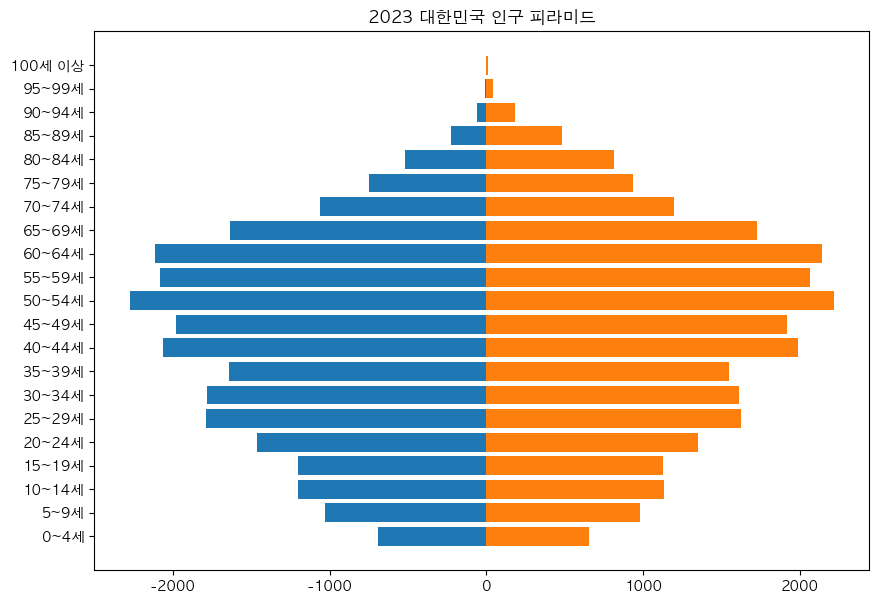

In [4]:
plt.figure(figsize=(10, 7))
plt.barh(df_m.columns, -df_m.iloc[0] // 1000) # 단위 : 천 명
plt.barh(df_w.columns, df_w.iloc[0] // 1000)
plt.title('2023 대한민국 인구 피라미드')
plt.show()

### ✅ 출생아수 및 합계출산율 그래프 그려보기

In [5]:
df = pd.read_excel('142801_20231128153451813_excel.xlsx', skiprows=2, nrows=2, index_col=0)
df.rename(index={'출생아\xa0수':'출생아 수', '합계\xa0출산율':'합계 출산율'}, inplace=True)
df = df.T

/Users/heeju/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


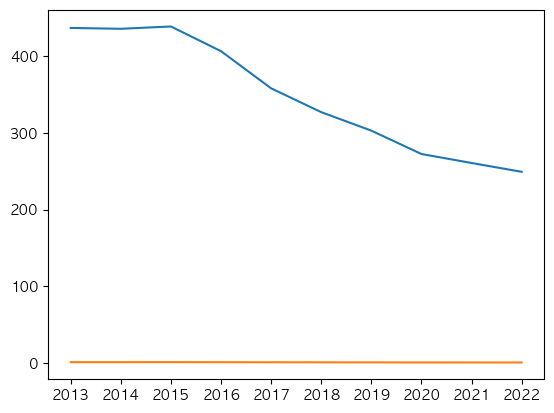

In [6]:
# y축 범위차가 심함
plt.plot(df.index, df['출생아 수'])
plt.plot(df.index, df['합계 출산율'])
plt.show()

#### ✔️ 다중 그래프 그릴 때 팁
: y값 차이가 심할 때, axes 사용

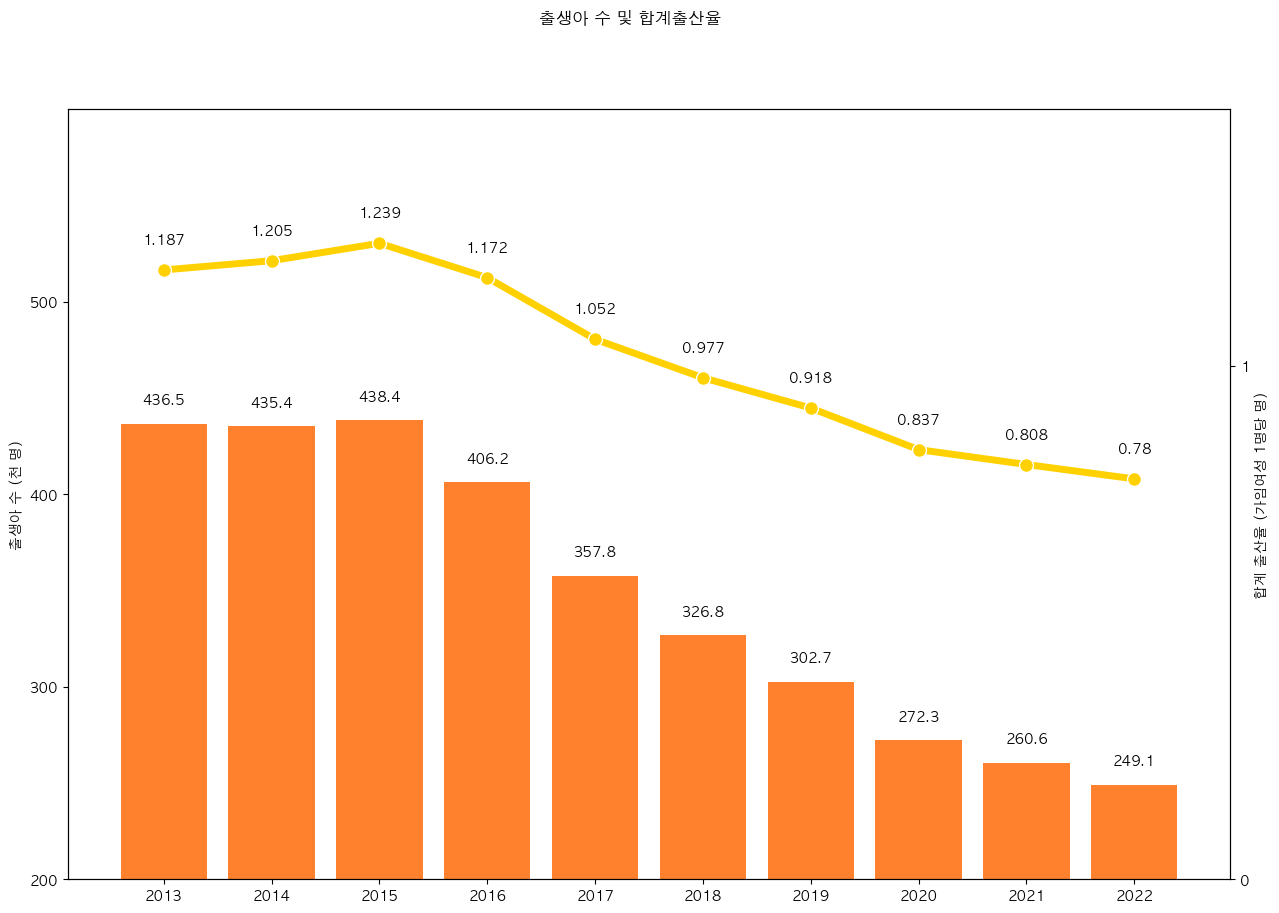

In [7]:
fig, ax1 = plt.subplots(figsize=(15, 10))
fig.suptitle('출생아 수 및 합계출산율')
ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(200, 600)
ax1.set_yticks([200, 300, 400, 500])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')
for idx, val in enumerate(df['출생아 수']):
    ax1.text(idx, val + 10, val, ha='center')

ax2 = ax1.twinx() # x축을 공유하는 쌍둥이 axis
ax2.set_ylabel('합계 출산율 (가임여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], color='#ffd100', marker='o', ms=10, lw=5, mec='w', mew=1)
for idx, val in enumerate(df['합계 출산율']):
    ax2.text(idx, val + 0.05, val, ha='center')
    
plt.show()